In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


from sklearn.model_selection import train_test_split # to Split Train-Test data
from sklearn import tree # To get Decision Tree
from sklearn.linear_model import SGDRegressor #to get the SGDRegressor
from sklearn import metrics # To generate evaluation metrices
from sklearn.model_selection import cross_val_predict # To generate evaluation metrices
from sklearn.model_selection import cross_val_score # To generate evaluation metrices

import matplotlib.pyplot as plt # Plotting

In [21]:
data = pd.read_csv(r'C:\Users\CLL\Documents\Github\Ce888 Assignment\Ce888Assignment\Protein structure\CASP.csv')


In [39]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['RMSD'],axis='columns'),data['RMSD'],test_size=0.2,random_state=0)
print(X_train.shape)
print(X_test.shape)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Initialise a Decision Tree with maximum depth of 3
dtRegressor = tree.DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

(36584, 9)
(9146, 9)


Crossvalidation Coefficient of determination on training set : 0.21156069325502988




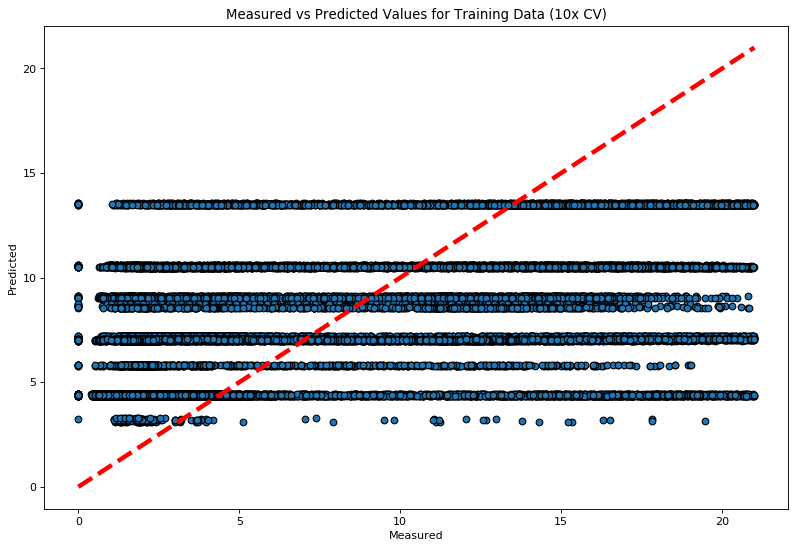

Coefficient of determination on test set:  0.21487134412513545

Mean Squared Error on test set : 29.364094712687816


In [40]:
#Model Performance in Train Data
CV_predicted = cross_val_predict(dtRegressor, X_train, y_train, cv=10) # CV prediction on Train data
r2_score_cv = cross_val_score(dtRegressor, X_train, y_train, cv=10).mean() # CV model score on Train data
print ("Crossvalidation Coefficient of determination on training set :",r2_score_cv)
print("\n")
# Plot measured values vs predicted values Training Data
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(y_train, CV_predicted, edgecolors=(0, 0, 0))
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Measured vs Predicted Values for Training Data (10x CV)')
plt.show()

# Fit the model and predict
dtRegressor.fit(X_train,y_train)
y_predicted = dtRegressor.predict(X_test)

# Model Performance on test data
r2_score = dtRegressor.score(X_test,y_test) #R2 Score
print ("Coefficient of determination on test set: ",r2_score)

mse_score = metrics.mean_squared_error(y_test, y_predicted) #Mean Squared Error
print ("\nMean Squared Error on test set :",mse_score)

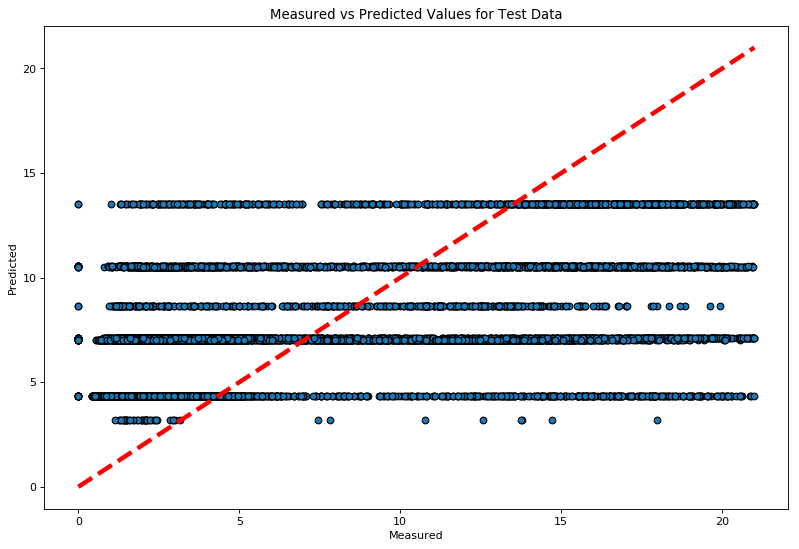

In [42]:
# Plot measured values vs predicted values
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(y_test, y_predicted, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Measured vs Predicted Values for Test Data')
plt.show()

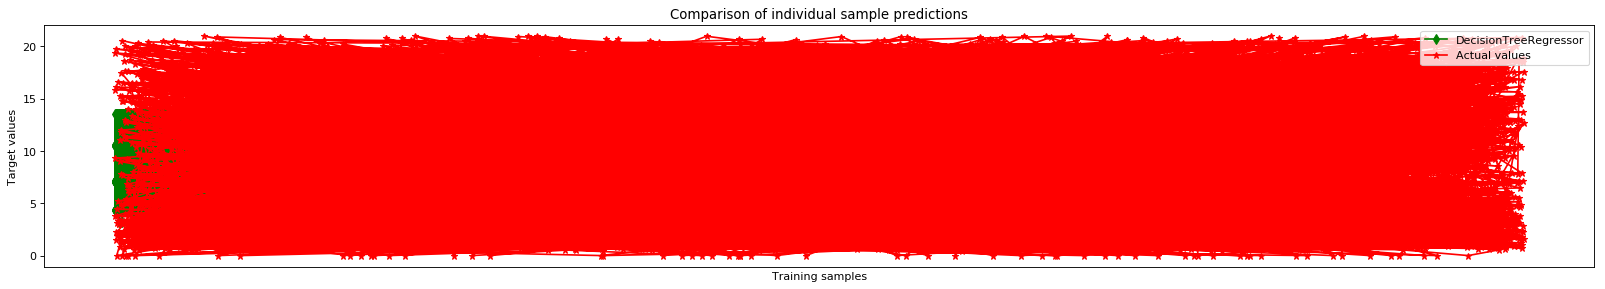

In [43]:
# Plot a one-to-one comparison of measured values vs predicted values
plt.figure(num=None, figsize=(25, 4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(y_predicted, 'gd-', label='DecisionTreeRegressor')
plt.plot(y_test, 'r*-', label='Actual values')
plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('Target values')
plt.xlabel('Training samples')
plt.legend(loc="best")
plt.title('Comparison of individual sample predictions')
plt.show()

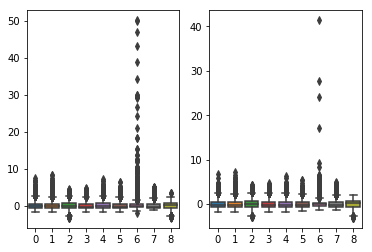

In [26]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns
#################
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.subplot(1,2,2)
sns.boxplot(data=X_test)
plt.show()

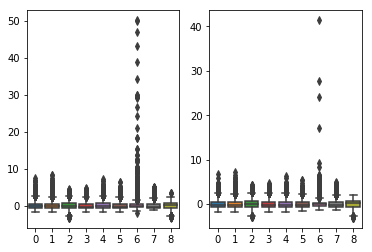

In [27]:
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

plt.subplot(1,2,1)
sns.boxplot(data=X_train_sc)
plt.subplot(1,2,2)
sns.boxplot(data=X_test_sc)
plt.show()

In [28]:
# Fit the model and predict
dtRegressor.fit(X_train_sc,y_train)
y_predicted = dtRegressor.predict(X_test_sc)

# Model Performance on test data
r2_score = dtRegressor.score(X_test_sc,y_test) #R2 Score
print ("Coefficient of determination on test set: ",r2_score)

mse_score = metrics.mean_squared_error(y_test, y_predicted) #Mean Squared Error
print ("\nMean Squared Error on test set :",mse_score)

Coefficient of determination on test set:  0.21487134412513545

Mean Squared Error on test set : 29.364094712687816


# Analysis 2

In [29]:
from sklearn.linear_model import SGDRegressor #to get the SGDRegressor
from sklearn import metrics # To generate evaluation metrices

In [30]:
data = pd.read_csv(r'C:\Users\CLL\Documents\Github\Ce888 Assignment\Ce888Assignment\Protein structure\CASP.csv')


X_train, X_test, y_train, y_test = train_test_split(data.drop(['RMSD'],axis='columns'),data['RMSD'],test_size=0.2,random_state=0)
print(X_train.shape)
print(X_test.shape)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

(36584, 9)
(9146, 9)


In [31]:
#Initialise a SGDRegressor with penalty l1
SGDReg = SGDRegressor(loss='squared_loss', penalty='l1', alpha=0.0001,
                 l1_ratio=0.15, fit_intercept=True, max_iter=1000, tol=0.001, 
                 shuffle=True, verbose=0, epsilon=0.1, random_state=None, learning_rate='invscaling',
                 eta0=0.01, power_t=0.25, early_stopping=False, validation_fraction=0.1,
                 n_iter_no_change=5, warm_start=False, average=False)

#Model Performance in Train Data
CV_predicted = cross_val_predict(SGDReg, X_train, y_train, cv=10) # CV prediction on Train data
r2_score_cv = cross_val_score(SGDReg, X_train, y_train, cv=10).mean() # CV model score on Train data
print ("Crossvalidation Coefficient of determination on training set :",r2_score_cv)
print("\n")

Crossvalidation Coefficient of determination on training set : 0.28089088278808666




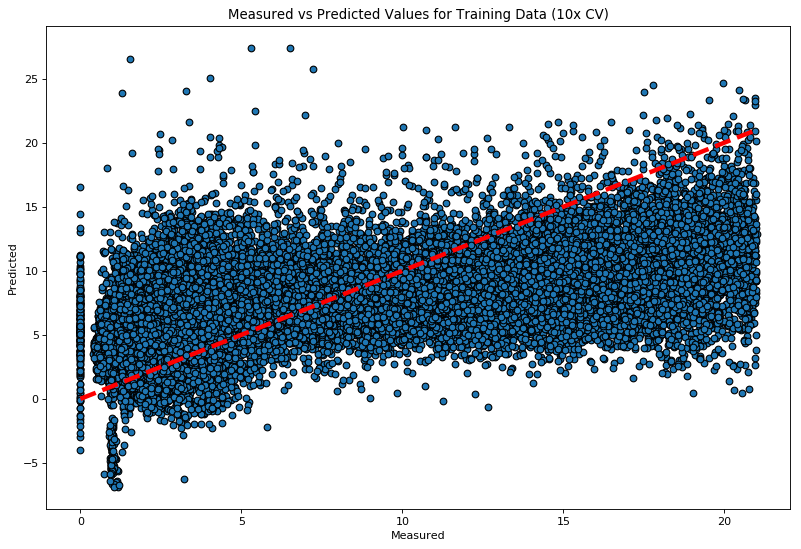

In [32]:
# Plot measured values vs predicted values Training Data
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(y_train, CV_predicted, edgecolors=(0, 0, 0))
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Measured vs Predicted Values for Training Data (10x CV)')
plt.show()

In [33]:
# Fit the model and predict
SGDReg.fit(X_train,y_train)
y_predicted = SGDReg.predict(X_test)

# Model Performance on test data
r2_score = SGDReg.score(X_test,y_test) #R2 Score
print ("Coefficient of determination on test set: ",r2_score)

mse_score = metrics.mean_squared_error(y_test, y_predicted) #Mean Squared Error
print ("\nMean Squared Error on test set :",mse_score)


Coefficient of determination on test set:  0.27452467028687244

Mean Squared Error on test set : 27.133038813462953


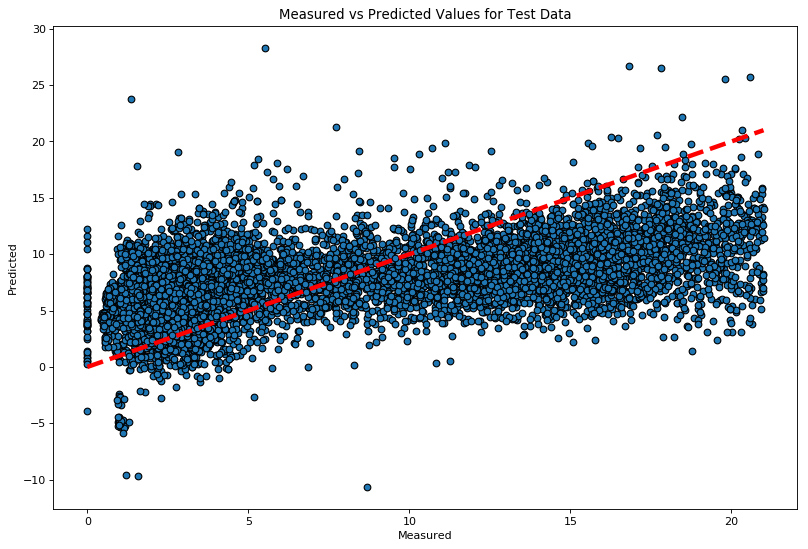

In [34]:
# Plot measured values vs predicted values
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(y_test, y_predicted, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Measured vs Predicted Values for Test Data')
plt.show()


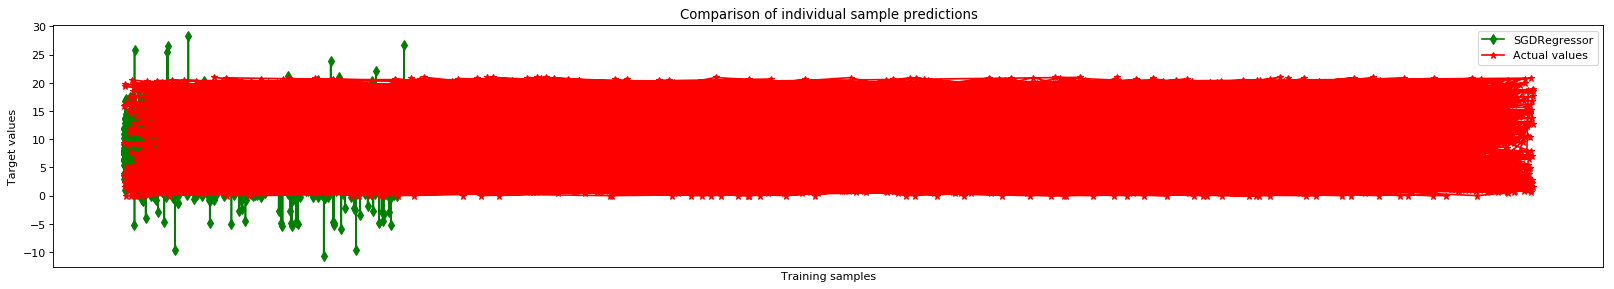

In [35]:
# Plot a one-to-one comparison of measured values vs predicted values
plt.figure(num=None, figsize=(25, 4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(y_predicted, 'gd-', label='SGDRegressor')
plt.plot(y_test, 'r*-', label='Actual values')
plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('Target values')
plt.xlabel('Training samples')
plt.legend(loc="best")
plt.title('Comparison of individual sample predictions')
plt.show()

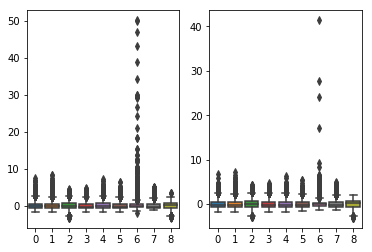

In [36]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns
#################
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.subplot(1,2,2)
sns.boxplot(data=X_test)
plt.show()


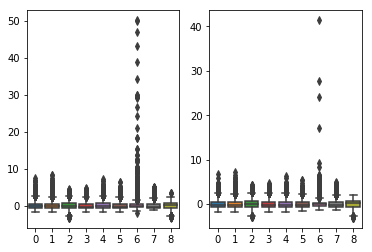

In [37]:
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

plt.subplot(1,2,1)
sns.boxplot(data=X_train_sc)
plt.subplot(1,2,2)
sns.boxplot(data=X_test_sc)
plt.show()


In [38]:
# Fit the model and predict
SGDReg.fit(X_train_sc,y_train)
y_predicted = SGDReg.predict(X_test_sc)

# Model Performance on test data
r2_score = SGDReg.score(X_test_sc,y_test) #R2 Score
print ("Coefficient of determination on test set: ",r2_score)

mse_score = metrics.mean_squared_error(y_test, y_predicted) #Mean Squared Error
print ("\nMean Squared Error on test set :",mse_score)


Coefficient of determination on test set:  0.27491480885669106

Mean Squared Error on test set : 27.118447490334567
